In [208]:
#import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random
import numpy as np
import matplotlib.pyplot as plt
import csv


## 1. Creation of a table of destinations and their attractions
The idea here is to create a list of cities and give them a random number of activities from a list of different categories. The distribution of number of activities per city will be lognormal, i. e., few cities will have a very low number and there will be fewer cities as this number increases, while most of them will be around the mode. The activities will be randomly put into one of the categories, with equal probabilities.

### 1.1 Creating the cities
The first idea was to name the cities as 'City_###', but I found a list of fictional locations from games, books, series and movies, so that will be more interesting. I'm using BeautifulSoup to read the website and extract the names of the cities.

In [119]:
#get list of fictional cities from website
url_cities = 'https://list.fandom.com/wiki/List_of_fictional_cities'
html_data=requests.get(url_cities).text
soup = BeautifulSoup(html_data,"html5lib") 

#getting the list from the HTML
list_cities=[]
html_text=soup.findAll('li')[81:-51]
for row in html_text:
    list_cities.append(row.text)

list_cities = [x.split(' - ')[0].split(',')[0].split(';')[0].split('(')[0] for x in list_cities]
#removing empty entries
list_cities = list(filter(None, list_cities))

#editing special cases (typos from the website)
list_special = ['Emmerdale from the British TV series of the same name','Capitol City the capital of the United States of America featured in the game Destroy All Humans! which is based on Washington DC.',
                "Walton's Mountain fictional site in the Blue Ridge Mountains for The Waltons","El-Ysa: village in Klatch in Terry Pratchett's Discworld. The inhabitants were killed when their well was poisoned ",
               "Kamurocho- A fictional city in the Yakuza series", "Everville -town on the West Coast of the USA in Clive Barker's Everville",
               "Earth City in Inverted World by Christopher Priest","Chronopolis by J. G. Ballard", "Villette of Charlotte Brontë", 
               "Ramgarh- Typical village in central India in early 70's. Venue for Bollywood blockbuster Sholay.","Tashbaan capital of the fictional land of Calormen in the Chronicles of Narnia",
               "Empire Bay- Fictional city inspired by New York in Mafia II","Omelas — utopian city from the short story The Ones Who Walk Away From Omelas by Ursula K. Le Guin",
               "St. Erasmus and St. Elmo's- fictional island in the South Caribbean", "The City of Dreadful Night by James Thomson",
               "Isidora from Le città invisibili by Italo Calvino.","PYRUS- capital city of Genovia from the movie the princess diaries",
               "Math a fictional state in an unpublished book 'Math Genius'","DenCity or DenTechCity", "Ephebe -somewhat Grecian city on the Circle Sea in Terry Pratchett's Discworld. Ruled by the "]
list_replace = ['Emmerdale','Capitol City',"Walton's Mountain",'El-Ysa','Kamurocho','Everville','Earth City','Chronopolis', 'Villette','Ramgarh','Tashbaan',"Empire Bay","Omelas",
               "St. Erasmus and St. Elmo's","The City of Dreadful Night","Isidora","Pyrus", "Math",'DenCity','Ephebe']

set1 = set(list_cities)
set2 = set(list_special)
list_cities = list(set1 - set2)
list_cities = list_cities+list_replace


print('Number of cities:',len(list_cities))
list_cities[0:10]


Number of cities: 986


['Quirm',
 'Shelbyville',
 'Bristo Camino',
 'Piltover',
 'Sheltered Shrubs',
 'Robotropolis',
 'Farburg',
 'Rampart Junction',
 'Helldorado',
 'Deer Meadow']

### 1.2 Creating the categories
Looking at websites that sell travel packages, we see lots of categories that are too similar. So here we defined ten different classes that represent most of the options. We are doing this so that each activity is only tagged by one of the categories.

In [120]:
categories = ['Food','Parks','Museums','Hiking','Beach','Romantic','History','Music','Theater','Sports']

### 1.3 Adding the activites to the cities
For each city from our list, we will randomly pick a number of activities, each one assigned to one of the categories above.

In [121]:
cities_activities = []
check_num_act = []
for city in list_cities:
    temp = [city]
    num_act = int(np.ceil(np.random.lognormal(2., 1.)))
    if num_act > 50:
        num_act = 50
    check_num_act.append(num_act)
    for ii in range(num_act):
        temp.append(categories[random.randint(0,9)]) 
    cities_activities.append(temp)
cities_activities[0]

['Quirm', 'Sports', 'Parks', 'Museums', 'Music']

We can check if our distribution meets our expectation by plotting the histogram of the number of cities with a certain number of activities.

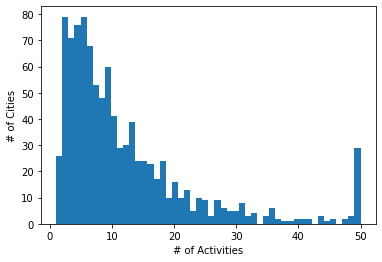

In [122]:
plt.hist(check_num_act,bins=50)
plt.xlabel('# of Activities')
plt.ylabel('# of Cities')
plt.show()

Let's turn this list of cities and activities into a dataframe and then export the file for later use.

In [123]:
columns_df = ['City']
for ii in range(50):
    if len(str(ii+1))<2:
        temp = 'Activity0'+str(ii+1)
    else:
        temp = 'Activity'+str(ii+1)
    columns_df.append(temp)
print(columns_df)

['City', 'Activity01', 'Activity02', 'Activity03', 'Activity04', 'Activity05', 'Activity06', 'Activity07', 'Activity08', 'Activity09', 'Activity10', 'Activity11', 'Activity12', 'Activity13', 'Activity14', 'Activity15', 'Activity16', 'Activity17', 'Activity18', 'Activity19', 'Activity20', 'Activity21', 'Activity22', 'Activity23', 'Activity24', 'Activity25', 'Activity26', 'Activity27', 'Activity28', 'Activity29', 'Activity30', 'Activity31', 'Activity32', 'Activity33', 'Activity34', 'Activity35', 'Activity36', 'Activity37', 'Activity38', 'Activity39', 'Activity40', 'Activity41', 'Activity42', 'Activity43', 'Activity44', 'Activity45', 'Activity46', 'Activity47', 'Activity48', 'Activity49', 'Activity50']


In [124]:
city_table = pd.DataFrame(cities_activities,columns=columns_df)
city_table.head()

,City,Activity01,Activity02,Activity03,Activity04,Activity05,Activity06,Activity07,Activity08,Activity09,...,Activity41,Activity42,Activity43,Activity44,Activity45,Activity46,Activity47,Activity48,Activity49,Activity50
0,Quirm,Sports,Parks,Museums,Music,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Shelbyville,Hiking,History,Romantic,Sports,Music,History,Museums,Food,Theater,...,None,None,None,None,None,None,None,None,None,None
2,Bristo Camino,Parks,Sports,Parks,Food,Beach,Museums,Hiking,Sports,None,...,None,None,None,None,None,None,None,None,None,None
3,Piltover,Hiking,Music,Sports,Romantic,Music,Romantic,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Sheltered Shrubs,Hiking,Museums,Sports,Theater,Hiking,Hiking,Food,Romantic,History,...,None,None,None,None,None,None,None,None,None,None


In [194]:
city_table.tail(10)

,City,Activity01,Activity02,Activity03,Activity04,Activity05,Activity06,Activity07,Activity08,Activity09,...,Activity41,Activity42,Activity43,Activity44,Activity45,Activity46,Activity47,Activity48,Activity49,Activity50
976,Tashbaan,Music,Beach,History,Museums,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
977,Empire Bay,Music,Hiking,Music,Theater,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
978,Omelas,Museums,Romantic,Theater,Hiking,Beach,Romantic,Food,Food,Hiking,...,None,None,None,None,None,None,None,None,None,None
979,St. Erasmus and St. Elmo's,Food,Romantic,Parks,Hiking,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
980,The City of Dreadful Night,Museums,Theater,Food,Museums,Food,Beach,Food,Beach,Food,...,None,None,None,None,None,None,None,None,None,None
981,Isidora,Music,Museums,Museums,Romantic,Sports,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
982,Pyrus,Music,Sports,Hiking,Parks,Museums,Sports,Music,Food,None,...,None,None,None,None,None,None,None,None,None,None
983,Math,Sports,Beach,History,Sports,Parks,Sports,Romantic,History,Hiking,...,None,None,None,None,None,None,None,None,None,None
984,DenCity,History,Food,Sports,Romantic,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
985,Ephebe,Music,Parks,Romantic,History,Romantic,Theater,Theater,Sports,Museums,...,None,None,None,None,None,None,None,None,None,None


In [126]:
city_table.to_csv('city_table.csv',sep=';',index=False)

## 2. Creation of users and their history
The idea here is to create a large number of users by choosing a set of cities and activities they previously visited. For each customer, we will randomly pick a number of cities they already visited and select some of the local available activities.

### 2.1 Creating the users
The first idea was to name the users as 'User_#####', but I found a list with the distribution of given names in Brazil, so that will be more interesting. I'm importing the table and will focus only on the names, not the distribution.

In [132]:
with open('ibgenomes.csv', 'r') as read_obj: # read csv file as a list of lists
  csv_reader = csv.reader(read_obj) # pass the file object to reader() to get the reader object
  list_users_ibge = list(csv_reader) # Pass reader object to list() to get a list of lists

list_users = []
for row in list_users_ibge[1:]:
    list_users = list_users + [row[0]]

list_users[:10]

['MARIA',
 'JOSE',
 'ANA',
 'JOAO',
 'ANTONIO',
 'FRANCISCO',
 'CARLOS',
 'PAULO',
 'PEDRO',
 'LUCAS']

### 2.2 Selecting cities and activities
Now we will create a list with user, city, activity and category. We again use a lognormal distribution to choose the number of cities visited by each user. We randomly select this number of cities. For each city, we count the number of activities available and randomly select how many the user has done, selecting which ones also randomly. 

In [189]:
user_history = []

for name in list_users:
    num_cities = int(np.ceil(np.random.lognormal(.001, 1.)))
    if num_cities>len(city_table):
        num_cities=len(city_table)
    
    city_picks = random.sample(range(len(city_table)),num_cities)    
    for city in city_picks:
        num_act_city = 50-city_table.iloc[city,1:].isnull().sum()
        num_act = random.randint(1,num_act_city)
        act_picks = random.sample(range(num_act_city),num_act)
        for act in act_picks:
            user_history.append([name,city_table.iloc[city,0],columns_df[act+1],city_table.iloc[city,act+1]])

print(len(user_history))
user_history[100000:200000:500]

906998


[['LUZINALDO', 'San Narciso', 'Activity03', 'History'],
 ['FENANDA', 'Belvedere', 'Activity02', 'Romantic'],
 ['CASSIELE', 'Smallbridge', 'Activity07', 'Music'],
 ['OLIVAN', 'New Quahog', 'Activity20', 'Hiking'],
 ['MILZA', 'Capital City', 'Activity06', 'Museums'],
 ['ALEXANDE', 'Heatherfield', 'Activity01', 'Food'],
 ['AUGUSTINHA', 'Rubacava', 'Activity07', 'History'],
 ['HERIBERTO', 'Gopher Prairie', 'Activity07', 'History'],
 ['JOZELIA', 'Town', 'Activity05', 'Sports'],
 ['RERISON', 'Reefside', 'Activity17', 'Beach'],
 ['EDENISE', 'Manor Park', 'Activity45', 'Romantic'],
 ['LENNON', 'Cyber City', 'Activity08', 'Sports'],
 ['KATARINE', 'Lawson', 'Activity06', 'History'],
 ['GERDA', 'Fourside', 'Activity15', 'Parks'],
 ['FIDELINA', 'Dibley', 'Activity05', 'Parks'],
 ['DEUSAMAR', 'Tomoki City', 'Activity06', 'Museums'],
 ['ETIANE', 'Addley', 'Activity03', 'History'],
 ['ERVERTON', 'Knype', 'Activity39', 'Food'],
 ['PARICIA', 'Westopolis', 'Activity17', 'Theater'],
 ['SEVIRINO', 'Ouigee

Let's turn this list of users and activities into a dataframe and then export the file for later use.


In [190]:
columns_users = ['Name','City','Activity','Category']
user_table = pd.DataFrame(user_history,columns=columns_users)
user_table.head()

,Name,City,Activity,Category
0,MARIA,Middle Park,Activity01,Sports
1,MARIA,Middle Park,Activity02,Parks
2,MARIA,Starvania,Activity08,History
3,MARIA,Starvania,Activity05,Music
4,MARIA,Starvania,Activity07,Sports


In [193]:
user_table.tail(20)

,Name,City,Activity,Category
906978,WERBETY,Toytown,Activity02,Sports
906979,WERBETY,Toytown,Activity13,Romantic
906980,WERBETY,Toytown,Activity09,Theater
906981,WERBETY,Toytown,Activity05,Food
906982,WERBETY,Toytown,Activity07,Theater
906983,WERLIANE,Ariel City,Activity04,Hiking
906984,WERLIANE,Ariel City,Activity01,History
906985,WERLIANE,Ariel City,Activity05,Music
906986,WERLIANE,Ariel City,Activity03,Beach
906987,WERLIANE,Ariel City,Activity02,History


In [192]:
user_table.to_csv('user_table.csv',sep=';',index=False)

## 3. Comparing cities
From our table with the activities for each city, we will create a new table where each row represents a city and each column shows the proportion of its activities for each category. For a city with a single 'Hiking' activity, its row will have *1* in the 'Hiking' column. If a city has three activities ('Museums', 'Romantic', Ḿuseums'), it will have *0.67* in the 'Museums' column and *0.33* in the 'Romantic' one. <br>
With this, we will have a vector describing each city and we can measure the similarities between two cities by the correlation between their rows.

In [205]:
city_vector = city_table.apply(pd.Series.value_counts, axis=1)[categories].fillna(0)
city_vector = city_vector.div(city_vector.sum(axis=1), axis=0)
city_vector.insert(0, 'City', city_table['City'])
city_vector.head()

,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,Quirm,0.000000,0.25,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000
1,Shelbyville,0.050000,0.00,0.200000,0.100000,0.000000,0.250000,0.100000,0.150000,0.050000,0.100000
2,Bristo Camino,0.125000,0.25,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000
3,Piltover,0.000000,0.00,0.000000,0.166667,0.000000,0.333333,0.000000,0.333333,0.000000,0.166667
4,Sheltered Shrubs,0.045455,0.00,0.181818,0.318182,0.045455,0.090909,0.045455,0.000000,0.136364,0.136364


In [216]:
for ii in range(5):
    city_picks = random.sample(range(len(city_vector)),2)
    display(city_vector[city_vector.index.isin(city_picks)])
    print('Correlation between ',city_vector.iloc[city_picks[0],0],'and ',city_vector.iloc[city_picks[1],0],'is ',pearsonr(city_vector.iloc[city_picks[0],1:],city_vector.iloc[city_picks[1],1:])[0])

,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
58,Neo-Tokyo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
838,Iacon,0.135135,0.081081,0.108108,0.054054,0.162162,0.108108,0.081081,0.135135,0.054054,0.081081


Correlation between  Neo-Tokyo and  Iacon is  -0.18389242812245682


,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
866,Jidoor,0.05,0.05,0.25,0.05,0.0,0.2,0.2,0.1,0.1,0.0
947,Indianrockolis,0.00,0.00,0.00,0.40,0.0,0.2,0.0,0.2,0.0,0.2


Correlation between  Indianrockolis and  Jidoor is  -0.1781741612749496


,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
218,City 17,0.222222,0.000000,0.333333,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000
470,Dhagabad,0.052632,0.105263,0.236842,0.105263,0.026316,0.078947,0.052632,0.078947,0.131579,0.131579


Correlation between  City 17 and  Dhagabad is  0.3375448514050149


,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
279,Krasnoy,0.076923,0.076923,0.230769,0.153846,0.153846,0.076923,0.000000,0.076923,0.153846,0.00000
477,Neptune,0.096774,0.129032,0.096774,0.193548,0.064516,0.032258,0.064516,0.064516,0.096774,0.16129


Correlation between  Krasnoy and  Neptune is  0.053800013856250245


,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
650,Ciudad Cómoda,0.066667,0.066667,0.066667,0.133333,0.133333,0.266667,0.066667,0.066667,0.066667,0.066667
881,South Figaro,0.000000,0.000000,0.111111,0.555556,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111


Correlation between  Ciudad Cómoda  and  South Figaro is  0.037513483831563534


What we want is to find the cities with the highest correlation to our target. So let's try to find the cities most similar to our first city.

In [253]:
corr_df = pd.DataFrame(columns=['City','Correlation'])
for ii in range(len(city_vector)):
    temp=[city_vector.iloc[ii,0]]
    temp.append(pearsonr(city_vector.iloc[0,1:],city_vector.iloc[ii,1:])[0])
    corr_df.loc[len(corr_df)] = temp
corr_df = corr_df.sort_values(by='Correlation',ascending=False)
corr_df[corr_df['Correlation']>0.75]

,City,Correlation
0,Quirm,1.000000
351,The Well-Built City,0.821414
457,Ember,0.816497
860,Rockwell,0.801784
391,Santa Mira,0.800095
260,Innsmouth,0.771822
982,Pyrus,0.763763
692,Stoneybrook,0.763763
100,Centennial,0.759555
135,Rockapulco,0.759555


We now have the list of the cities most similar to *Quirm*. We can confirm this by displaying the vectors of those cities.

In [254]:
city_picks = corr_df[corr_df['Correlation']>0.75].index
display(city_vector[city_vector.index.isin(city_picks)])

,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,Quirm,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000
100,Centennial,0.066667,0.133333,0.133333,0.066667,0.066667,0.000000,0.133333,0.133333,0.066667,0.200000
135,Rockapulco,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000
260,Innsmouth,0.076923,0.153846,0.230769,0.076923,0.076923,0.000000,0.076923,0.230769,0.000000,0.076923
351,The Well-Built City,0.047619,0.142857,0.142857,0.142857,0.047619,0.047619,0.000000,0.238095,0.000000,0.190476
391,Santa Mira,0.166667,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667
457,Ember,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000
692,Stoneybrook,0.000000,0.250000,0.250000,0.125000,0.000000,0.125000,0.000000,0.125000,0.000000,0.125000
860,Rockwell,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
982,Pyrus,0.125000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000


## 4. Comparing users
From our table with the activities for each user, we will create a new table where each row represents a user and each column shows the proportion of its activities for each category. For a user with a single 'Hiking' activity, its row will have *1* in the 'Hiking' column. If a user has three activities ('Museums', 'Romantic', Ḿuseums'), it will have *0.67* in the 'Museums' column and *0.33* in the 'Romantic' one. We will group the activities from all visited cities.<br>
With this, we will have a vector describing each user and we can measure the similarities between two users by the correlation between their rows.

In [248]:
user_vector = pd.DataFrame(columns=categories)
list_names = user_table['Name'].unique().tolist()
for name in list_names:
    temp = []
    df_temp = user_table[user_table['Name']==name]
    for cat in categories:
        temp.append(len(df_temp[df_temp['Category']==cat]))
    user_vector.loc[len(user_vector)] = temp
user_vector = user_vector.div(user_vector.sum(axis=1), axis=0)
user_vector.insert(0, 'Name', list_names)
user_vector.head()

,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,MARIA,0,0.1,0.1,0.1,0.1,0,0.1,0.1,0.2,0.2
1,JOSE,0.027027,0.162162,0,0.189189,0.162162,0.0540541,0.108108,0.0540541,0.0810811,0.162162
2,ANA,0.2,0,0.2,0,0.2,0.2,0,0,0,0.2
3,JOAO,0,0,0,0,0.5,0,0,0,0.5,0
4,ANTONIO,0,0.5,0,0,0,0,0,0,0.5,0


In [249]:
for ii in range(5):
    user_picks = random.sample(range(len(user_vector)),2)
    display(user_vector[user_vector.index.isin(user_picks)])
    print('Correlation between ',user_vector.iloc[user_picks[0],0],'and ',user_vector.iloc[user_picks[1],0],'is ',pearsonr(user_vector.iloc[user_picks[0],1:],user_vector.iloc[user_picks[1],1:])[0])

,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
28792,CRISVANIA,0,0.181818,0,0.272727,0.181818,0.0909091,0,0,0.0909091,0.181818
54825,ITLO,0,0.5,0.5,0,0,0,0,0,0,0


Correlation between  CRISVANIA and  ITLO is  -0.04789131426105752


,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
39515,ALENALDO,0.142857,0.285714,0.142857,0,0,0,0.142857,0,0.142857,0.142857
61457,JULINAR,0.111111,0,0,0.111111,0.222222,0.111111,0.111111,0.222222,0,0.111111


Correlation between  JULINAR and  ALENALDO is  -0.7362477346177145


,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
6887,DAYVISON,0.0666667,0.0666667,0,0.133333,0.0666667,0.0666667,0.333333,0,0.2,0.0666667
62232,MICHEKE,0.2,0,0,0,0,0,0.6,0,0,0.2


Correlation between  DAYVISON and  MICHEKE is  0.7196763181246416


,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
20390,MACIR,0.166667,0,0.166667,0.333333,0,0.166667,0.166667,0,0,0
58000,NELDES,0.166667,0,0,0.333333,0.166667,0.166667,0.166667,0,0,0


Correlation between  NELDES and  MACIR is  0.7727272727272728


,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
52712,ERICELIO,0,0.227273,0.136364,0.0909091,0.0909091,0,0.136364,0.0454545,0.227273,0.0454545
59604,FRANCINEUSA,0,0.142857,0,0,0.142857,0,0.285714,0,0.285714,0.142857


Correlation between  FRANCINEUSA and  ERICELIO is  0.6400113534659774


What we want is to find the users with the highest correlation to our target. So let's try to find the users most similar to our first user.

In [255]:
corr_user_df = pd.DataFrame(columns=['Name','Correlation'])
for ii in range(len(user_vector)):
    temp=[user_vector.iloc[ii,0]]
    temp.append(pearsonr(user_vector.iloc[0,1:],user_vector.iloc[ii,1:])[0])
    corr_user_df.loc[len(corr_user_df)] = temp
corr_user_df = corr_user_df.sort_values(by='Correlation',ascending=False)
corr_user_df[corr_user_df['Correlation']>0.9]

/home/rodrigolink/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Name,Correlation
0,MARIA,1.000000
9107,ABRAHAO,0.922331
49894,FRANQUES,0.918559
1371,JACQUELINE,0.908674
40848,SALATIEU,0.906845
54591,RHAYCA,0.906845
43183,JOHNNYS,0.905419
48902,LEONILTO,0.903508
63980,JAIRRO,0.903508


We now have the list of the users most similar to *MARIA*. We can confirm this by displaying the vectors of those users.

In [256]:
user_picks = corr_user_df[corr_user_df['Correlation']>0.9].index
display(user_vector[user_vector.index.isin(user_picks)])

,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,MARIA,0,0.1,0.1,0.1,0.1,0,0.1,0.1,0.2,0.2
1371,JACQUELINE,0.0344828,0.103448,0.0689655,0.103448,0.103448,0.0689655,0.103448,0.103448,0.172414,0.137931
9107,ABRAHAO,0,0.0833333,0.125,0.0833333,0.125,0.0416667,0.0833333,0.125,0.166667,0.166667
40848,SALATIEU,0,0.0833333,0.166667,0.0833333,0.0833333,0,0.0833333,0.0833333,0.25,0.166667
43183,JOHNNYS,0.025641,0.102564,0.102564,0.0769231,0.102564,0.025641,0.153846,0.0769231,0.153846,0.179487
48902,LEONILTO,0.0526316,0.105263,0.0526316,0.105263,0.105263,0.0526316,0.105263,0.105263,0.157895,0.157895
49894,FRANQUES,0,0.1,0.05,0.05,0.1,0,0.15,0.1,0.2,0.25
54591,RHAYCA,0,0.0833333,0.0833333,0.166667,0.0833333,0,0.0833333,0.0833333,0.166667,0.25
63980,JAIRRO,0,0.111111,0.111111,0.111111,0.111111,0,0.111111,0,0.222222,0.222222


## 5. Comparing users and cities
We now have vectors representing each city and user, with their ratio of categories. We can find the cities that best match a user and vice versa. 

### 5.1 Finding cities matching an user
We will give an example by finding cities that are similar to the behavior of our first user.

In [261]:
corr_user_cities_df = pd.DataFrame(columns=['City','Correlation'])
for ii in range(len(city_vector)):
    temp=[city_vector.iloc[ii,0]]
    temp.append(pearsonr(user_vector.iloc[0,1:],city_vector.iloc[ii,1:])[0])
    corr_user_cities_df.loc[len(corr_user_cities_df)] = temp
corr_user_cities_df = corr_user_cities_df.sort_values(by='Correlation',ascending=False)
corr_user_cities_df[corr_user_cities_df['Correlation']>0.75]

,City,Correlation
785,Utropolis,0.866025
478,Aleero City,0.838002
667,Steklovks,0.805076
493,Stilwater,0.790569
864,Hicksville,0.790569
419,Suddenly,0.790569
427,Black Harbour,0.790569
120,Pleasantville,0.790569
82,New Crobuzon,0.790569
462,Valkanvania,0.761387


In [263]:
display(user_vector[user_vector.index==0])
user_cities_picks = corr_user_cities_df[corr_user_cities_df['Correlation']>0.75].index
display(city_vector[city_vector.index.isin(user_cities_picks)])

,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,MARIA,0,0.1,0.1,0.1,0.1,0,0.1,0.1,0.2,0.2


,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
82,New Crobuzon,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
120,Pleasantville,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
419,Suddenly,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
427,Black Harbour,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.333333,0.333333
462,Valkanvania,0.0,0.000000,0.222222,0.111111,0.111111,0.000000,0.111111,0.000000,0.222222,0.222222
478,Aleero City,0.0,0.090909,0.090909,0.000000,0.090909,0.000000,0.181818,0.090909,0.181818,0.272727
493,Stilwater,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
667,Steklovks,0.0,0.142857,0.142857,0.047619,0.047619,0.047619,0.095238,0.095238,0.142857,0.238095
785,Utropolis,0.0,0.100000,0.033333,0.100000,0.133333,0.000000,0.166667,0.066667,0.166667,0.233333
864,Hicksville,0.0,0.000000,0.100000,0.000000,0.200000,0.000000,0.100000,0.100000,0.300000,0.200000


### 5.2 Finding users matching a city
We will give an example by finding users that are similar to the behavior of our first city.

In [264]:
corr_city_users_df = pd.DataFrame(columns=['Name','Correlation'])
for ii in range(len(user_vector)):
    temp=[user_vector.iloc[ii,0]]
    temp.append(pearsonr(city_vector.iloc[0,1:],user_vector.iloc[ii,1:])[0])
    corr_city_users_df.loc[len(corr_city_users_df)] = temp
corr_city_users_df = corr_city_users_df.sort_values(by='Correlation',ascending=False)
corr_city_users_df[corr_city_users_df['Correlation']>0.9]

/home/rodrigolink/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Name,Correlation
61075,SYBELE,1.000000
29925,OESLEI,1.000000
35812,JOCSAN,1.000000
12548,DJEISON,1.000000
35463,RHADASSA,1.000000
46491,KESSILI,1.000000
24224,LORIVALDA,1.000000
25701,HERIBALDO,1.000000
8274,EDVIRGES,1.000000
35783,ARAAO,1.000000


In [265]:
display(city_vector[city_vector.index==0])
city_users_picks = corr_city_users_df[corr_city_users_df['Correlation']>0.9].index
display(user_vector[user_vector.index.isin(city_users_picks)])

,City,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
0,Quirm,0.0,0.25,0.25,0.0,0.0,0.0,0.0,0.25,0.0,0.25


,Name,Food,Parks,Museums,Hiking,Beach,Romantic,History,Music,Theater,Sports
204,OSVALDO,0,0.25,0.25,0,0,0,0,0.25,0,0.25
1127,TAMIRIS,0,0.25,0.25,0,0,0,0,0.25,0,0.25
2981,BALBINO,0,0.25,0.25,0,0,0,0,0.25,0,0.25
4554,AMELIO,0,0.25,0.25,0,0,0,0,0.25,0,0.25
4745,MAGDALENA,0,0.25,0.25,0,0,0,0,0.25,0,0.25
5915,RONEIDE,0,0.4,0.2,0,0,0,0,0.2,0,0.2
6630,EDERSOM,0,0.230769,0.153846,0,0.0769231,0,0.0769231,0.230769,0,0.230769
7879,CARLIANA,0,0.2,0.2,0.1,0,0.1,0,0.2,0,0.2
8274,EDVIRGES,0,0.25,0.25,0,0,0,0,0.25,0,0.25
10233,AGNEL,0,0.2,0.2,0.1,0,0.1,0,0.2,0,0.2


## 6 City Suggestions
For a selected user, we want to make recommendations of cities that match their history and try to rank them. The first option is finding cities by correlation with the user vector (done in section 5.1). Another option is to find the users that have the highest correlation (section 4) and find the city that is most common among them.

Let's build upon we have done in section 4 and try to find the cities visited by those users.

In [266]:
corr_user_df[corr_user_df['Correlation']>0.9]

,Name,Correlation
0,MARIA,1.000000
9107,ABRAHAO,0.922331
49894,FRANQUES,0.918559
1371,JACQUELINE,0.908674
40848,SALATIEU,0.906845
54591,RHAYCA,0.906845
43183,JOHNNYS,0.905419
48902,LEONILTO,0.903508
63980,JAIRRO,0.903508


We want to create a list of cities visited by these users and how many times each one was visited. We will remove any cities that were already visited by our target.

In [285]:
list_corr_names = corr_user_df[corr_user_df['Correlation']>0.9]['Name'].tolist()
target_index = 0
user_table_filtered = user_table[user_table['Name'].isin(list_corr_names)]
list_corr_cities = []
for name in list_corr_names:
    if user_vector[user_vector['Name']==name].index == target_index:
        list_target = user_table_filtered[user_table_filtered['Name']==name]['City'].unique().tolist()
    else:
        list_corr_cities += user_table_filtered[user_table_filtered['Name']==name]['City'].unique().tolist()
count_corr_cities = {i:list_corr_cities.count(i) for i in list_corr_cities}
max_value = max(count_corr_cities.values()) 
if max_value > 1:
    sugg_cities = [k for k, v in count_corr_cities.items() if v == max_value]
    
else:
    sugg_cities = count_corr_cities.keys

sugg_cities = list(set(sugg_cities)-set(list_target))
print('List of cities:', sugg_cities,'with', max_value,'occurence(s).')    

List of cities: ['Utropolis', 'Willows'] with 2 occurence(s).


Let's check the correlation of these cities with our target user.

In [284]:
corr_user_cities_test_df = pd.DataFrame(columns=['City','Correlation'])
city_vector_filtered = city_vector[city_vector['City'].isin(sugg_cities)]
for ii in range(len(city_vector_filtered)):
    temp=[city_vector_filtered.iloc[ii,0]]
    temp.append(pearsonr(user_vector.iloc[0,1:],city_vector_filtered.iloc[ii,1:])[0])
    corr_user_cities_test_df.loc[len(corr_user_cities_test_df)] = temp
corr_user_cities_test_df = corr_user_cities_test_df.sort_values(by='Correlation',ascending=False)
corr_user_cities_test_df

,City,Correlation
1,Utropolis,0.866025
0,Willows,0.345033
